<a href="https://colab.research.google.com/github/KHANmdAFFAN/Data_science/blob/main/adult_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import TweedieRegressor
import warnings
warnings.simplefilter('ignore')

In [ ]:
df= pd.read_csv("/content/adult.csv")

                

In [ ]:
df.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [ ]:
df.describe().T # rows are converting into columns

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## FINDING '?'

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

# HANDLING '?'

In [ ]:
df.replace('?' , np.NaN , inplace =True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
cols = ['workclass','occupation','native.country']
for col in cols :
  df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


FEATURE ENGINEERING

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['workclass']=df['workclass'].replace(['Local-gov','State-gov','Federal-gov'],'gov-job')

In [ ]:
df['workclass'].value_counts()

Private             24532
gov-job              4351
Self-emp-not-inc     2541
Self-emp-inc         1116
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['marital.status']=df['marital.status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
df['marital.status']=df['marital.status'].replace(['Never-married'],'Unmarried')
df['marital.status']=df['marital.status'].replace(['Divorced','Separated','Widowed'],'Married-spouse-absent')

In [ ]:
df['marital.status'].value_counts()

Married                  14999
Unmarried                10683
Married-spouse-absent     6879
Name: marital.status, dtype: int64

In [ ]:
df['education'] = df['education'].replace(['11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool','Prof-school','HS-grad'],'school')
df['education'] = df['education'].replace(['Some-college','Bachelors','Masters'],'college')
df['education'] = df['education'].replace(['Assoc-voc','Assoc-acdm'],'Assoc')

In [ ]:
df['education'].value_counts()

school       15330
college      14369
Assoc         2449
Doctorate      413
Name: education, dtype: int64

In [ ]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
df['income']=df['income'].replace(['<=50K'],'0')
df['income']=df['income'].replace(['>50K'],'1')


In [ ]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

DATA VISUALISATION

In [ ]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 4.6 MB/s 
     |████████████████████████████████| 133 kB 67.9 MB/s 
     |████████████████████████████████| 78 kB 10.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 965 kB 64.4 MB/s 
     |████████████████████████████████| 749 kB 67.1 MB/s 
     |████████████████████████████████| 101 kB 14.6 MB/s 
     |████████████████████████████████| 943 kB 56.1 MB/s 
     |████████████████████████████████| 1.0 MB 61.2 MB/s 
     |████████████████████████████████| 50 kB 9.4 MB/s 
     |████████████████████████████████| 28.5 MB 1.2 MB/s 
     |████████████████████████████████| 141 kB 66.7 MB/s 
     |████████████████████████████████| 96 kB 8.0 MB/s 
     |████████████████████████████████| 232 kB 80.8 MB/s 
     |█████████████████████


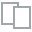
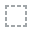
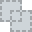
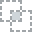
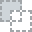
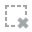
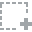
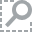
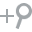
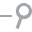
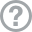
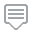
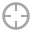
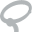
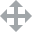
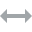
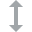
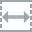
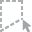
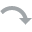
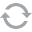
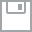
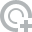
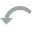
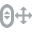
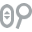
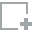
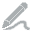
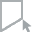
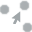
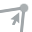
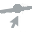

In [ ]:
from dataprep.eda import plot
plot(df)

INCOME

In [ ]:
df['income'].value_counts()/len(df)*100 # THIS SHOWS VALUES ARE IMBALANCE


0    75.919044
1    24.080956
Name: income, dtype: float64

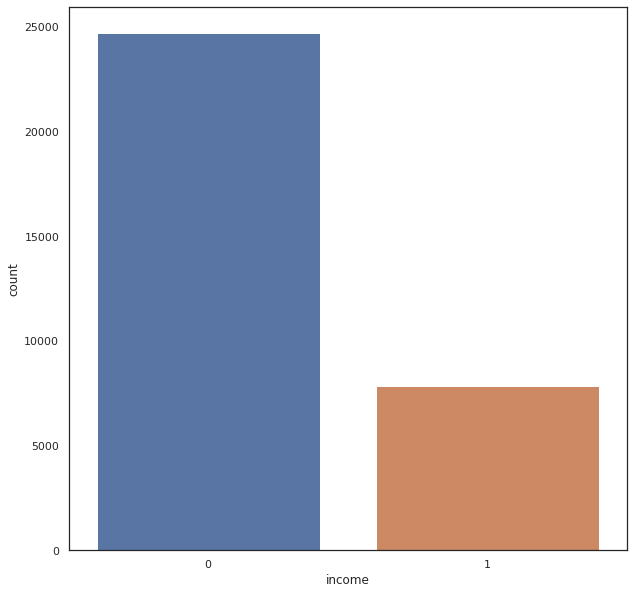

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.countplot(df['income'])

Text(0.5, 1.0, 'income vs hours per week')

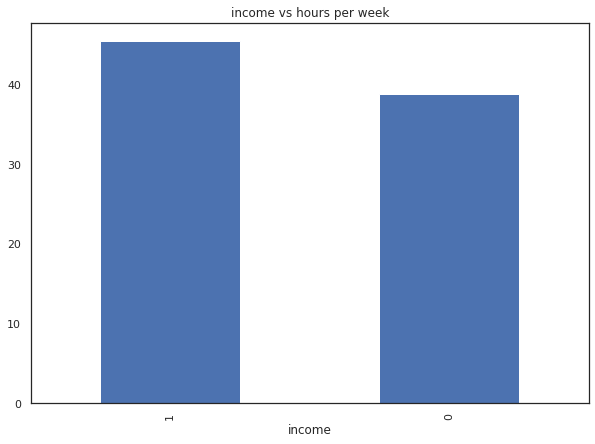

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('white')
df.groupby('income')['hours.per.week'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('income vs hours per week')

EDUCATION VS EDUCATION.NUM

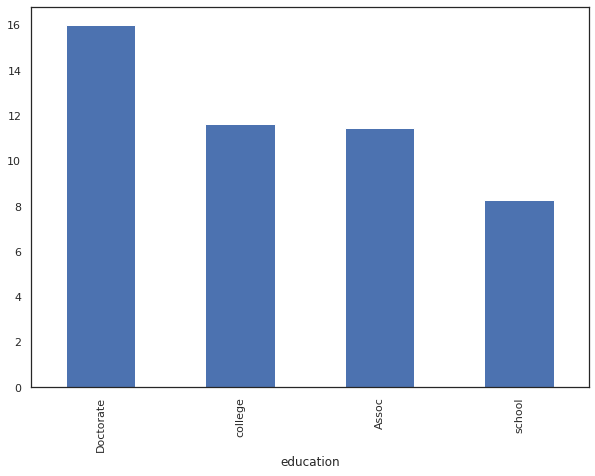

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('white')
df.groupby('education')['education.num'].mean().sort_values(ascending=False).plot(kind='bar')

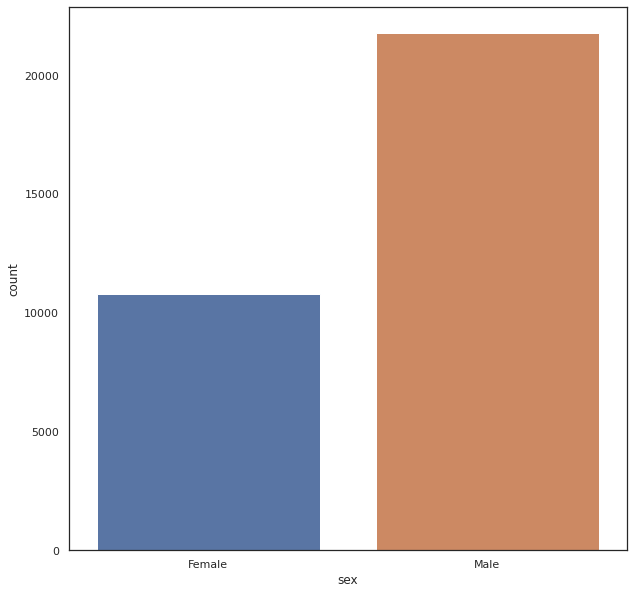

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.countplot(df['sex'])

Text(0.5, 1.0, 'Marital distribution')

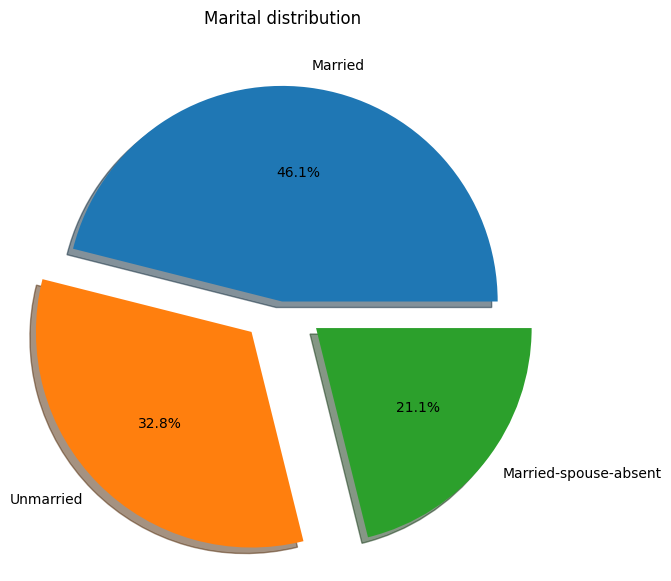

In [ ]:
# Creating a pie chart for 'Marital status'
marital = df['marital.status'].value_counts()/len(df)*100
plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels = marital.index, explode=(
    0, 0.20,0.20), shadow=True, autopct='%1.1f%%')     #------- We use autopct to display the percent value using Python string formatting. For example, autopct='%1.1f%%' means that for each pie wedge, the format string is '1.1f%'.
plt.title('Marital distribution')    

Text(0.5, 1.0, 'Relationship')

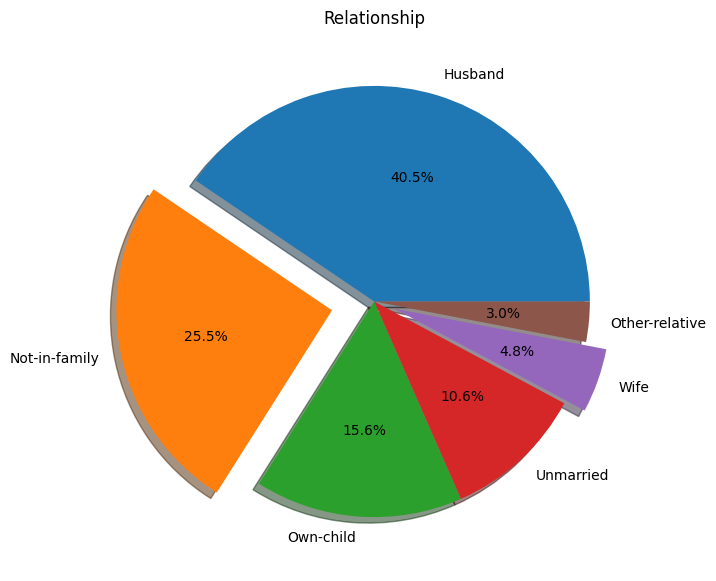

In [ ]:
relation_ship = df['relationship'].value_counts()/len(df)*100
plt.figure(figsize=(10,7))
plt.style.use('default')
plt.pie(relation_ship ,labels= relation_ship.index, explode=(0,0.20,0,0,0.1,0),shadow =True , autopct = '%1.1f%%')
plt.title('Relationship')


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Text(0.5, 1.0, 'EDUCATION')

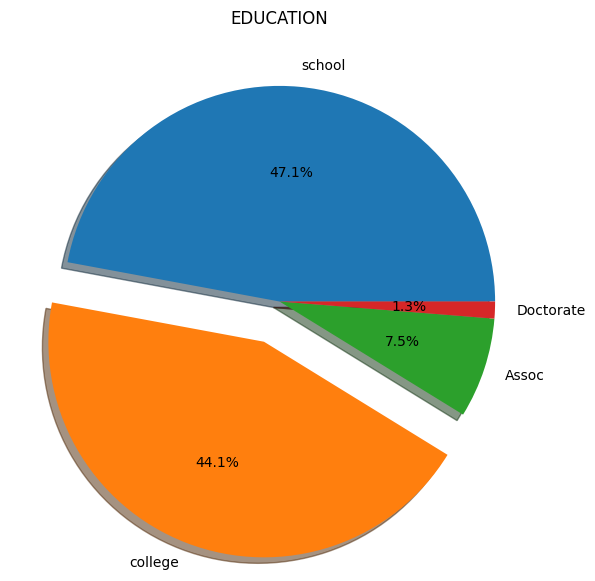

In [ ]:
education = df['education'].value_counts()
plt.figure(figsize=(10,7))
plt.style.use('default')
plt.pie(education,labels = education.index,shadow=True,explode=(0,0.20,0,0),autopct='%1.1f%%')
plt.title('EDUCATION')

In [ ]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


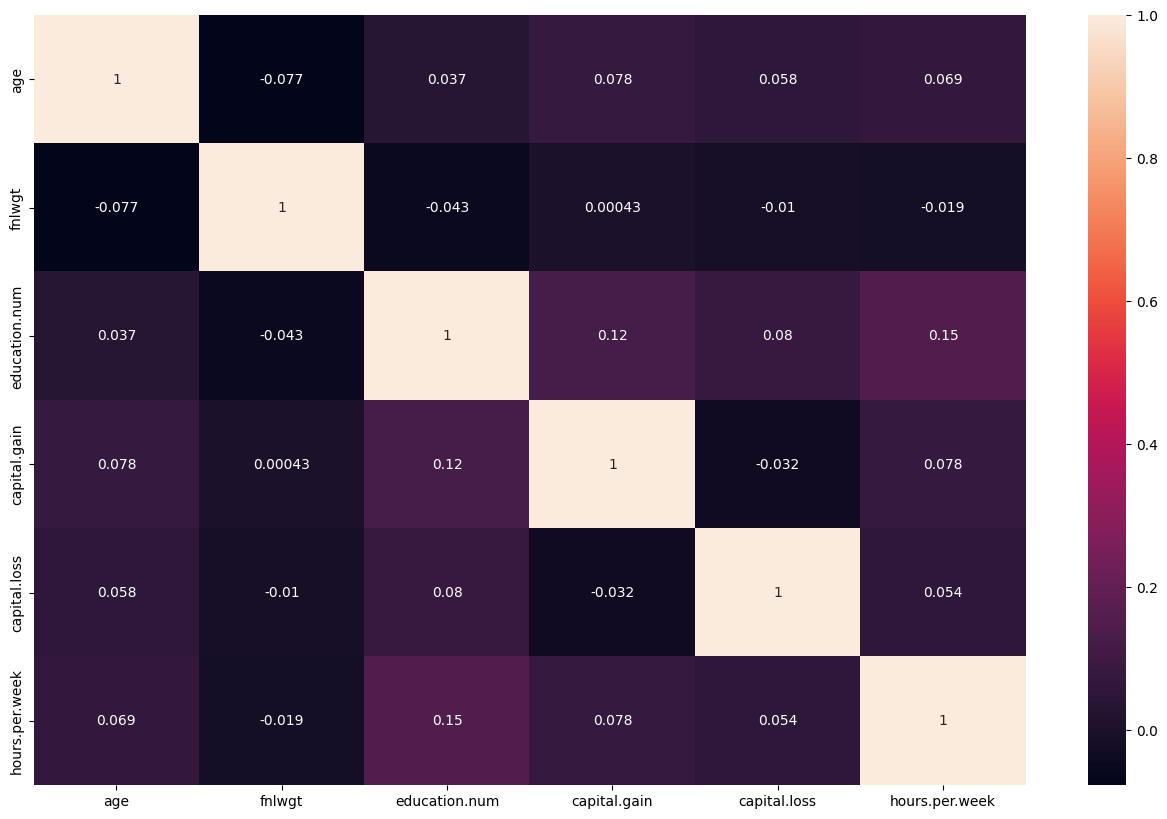

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

there is no correlation 

CHECKING SKEWNESS

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [ ]:
from scipy.stats import skew

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
income             1.212430
dtype: float64

fnlwgt
skewness of columns are :  1.4469134351423292


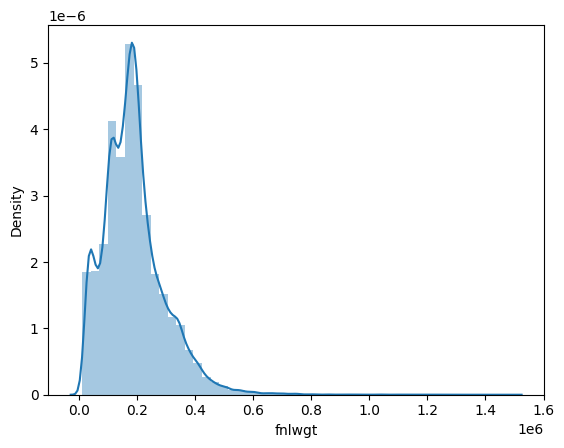

education.num
skewness of columns are :  -0.3116615096354675


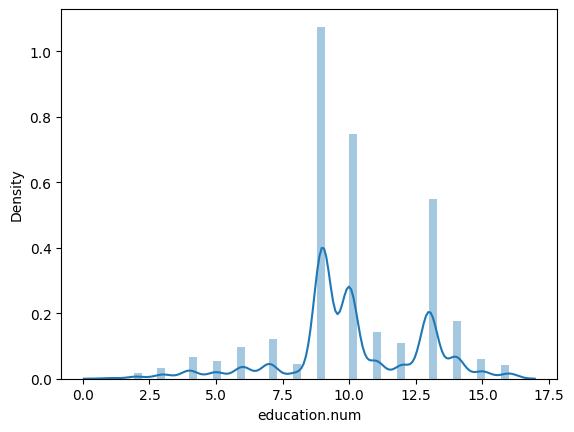

capital.gain
skewness of columns are :  11.953296998194327


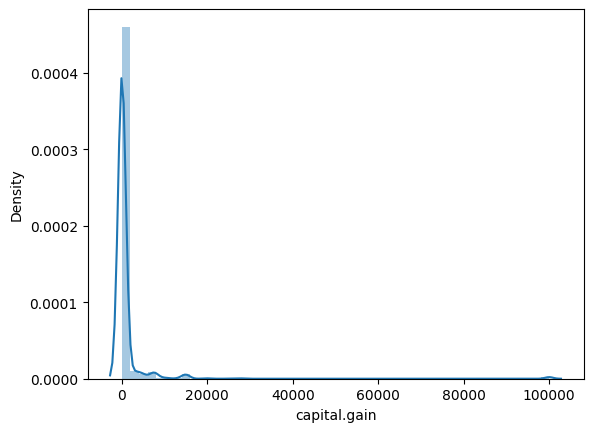

capital.loss
skewness of columns are :  4.594417456439774


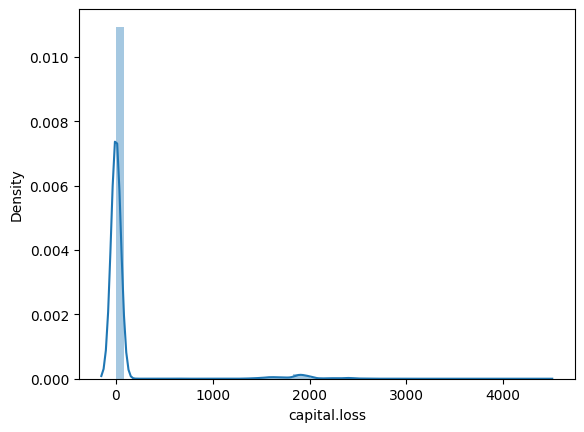

hours.per.week
skewness of columns are :  0.22763204977477705


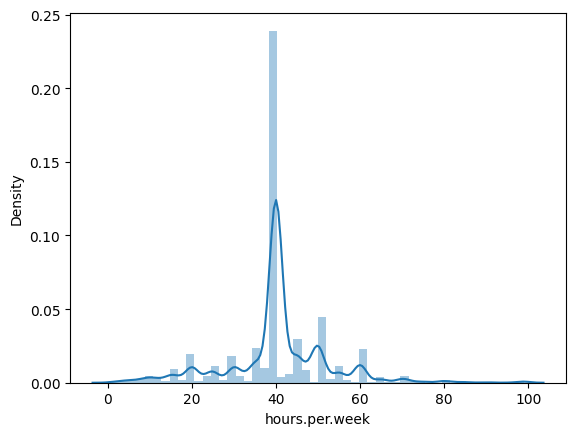

In [ ]:
cols = ['fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
for col in cols:
  print(col)
  print("skewness of columns are : ",skew(df[col]))

  plt.figure()
  sns.distplot(df[col],kde=True )

  plt.show()


## HANDLING SKWNESS

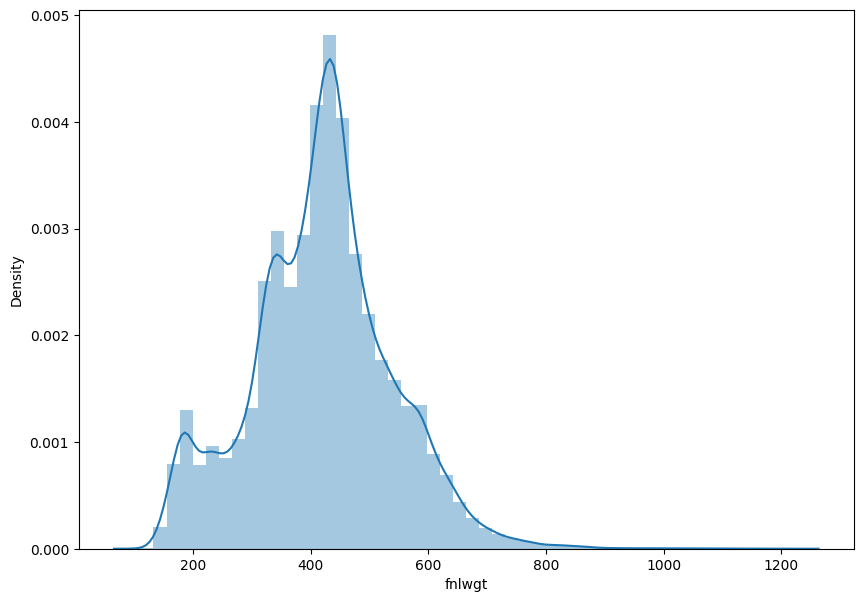

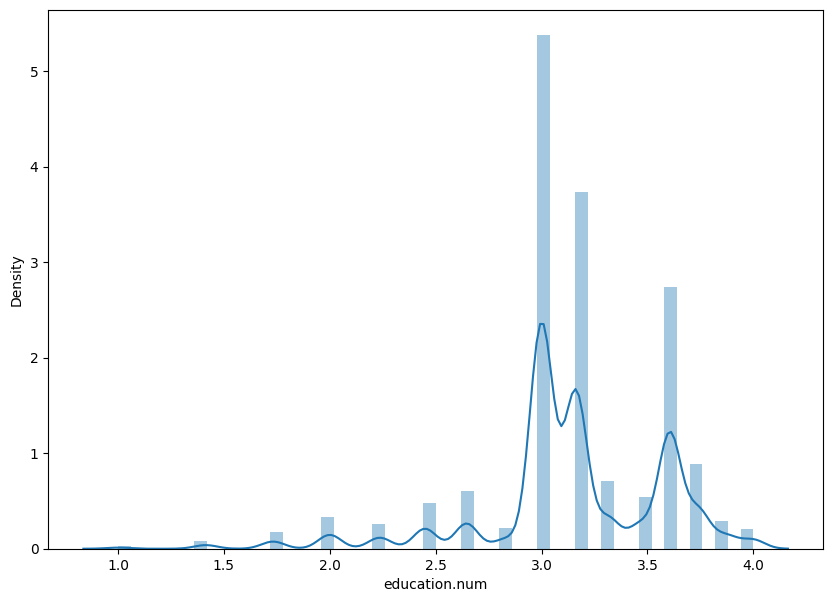

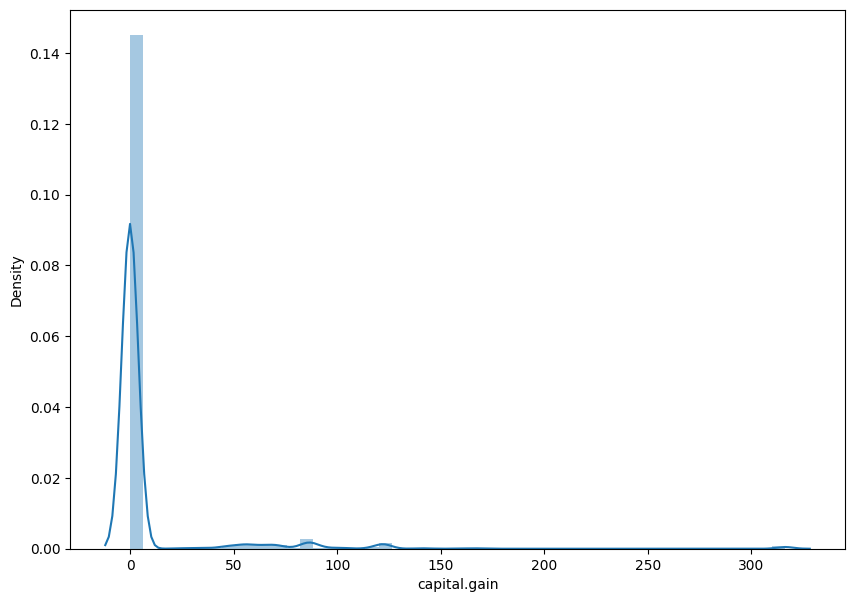

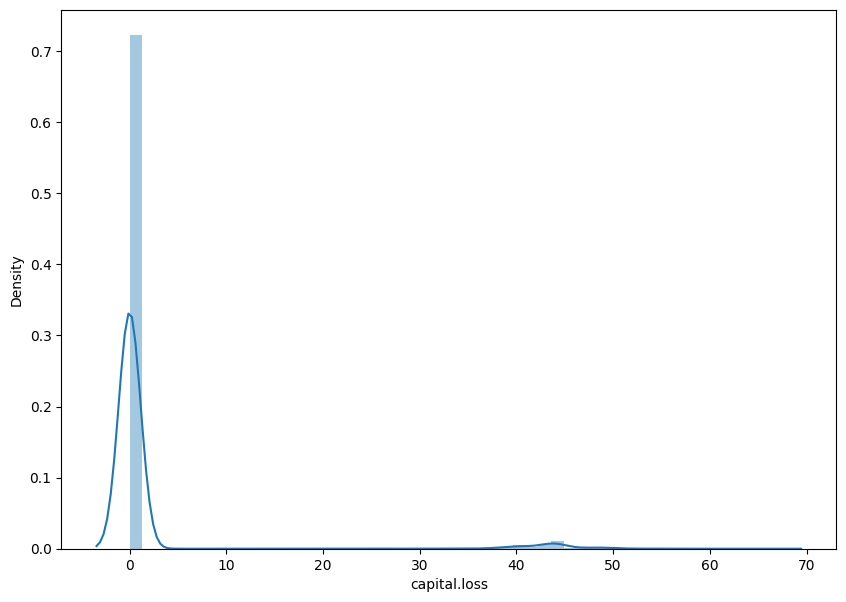

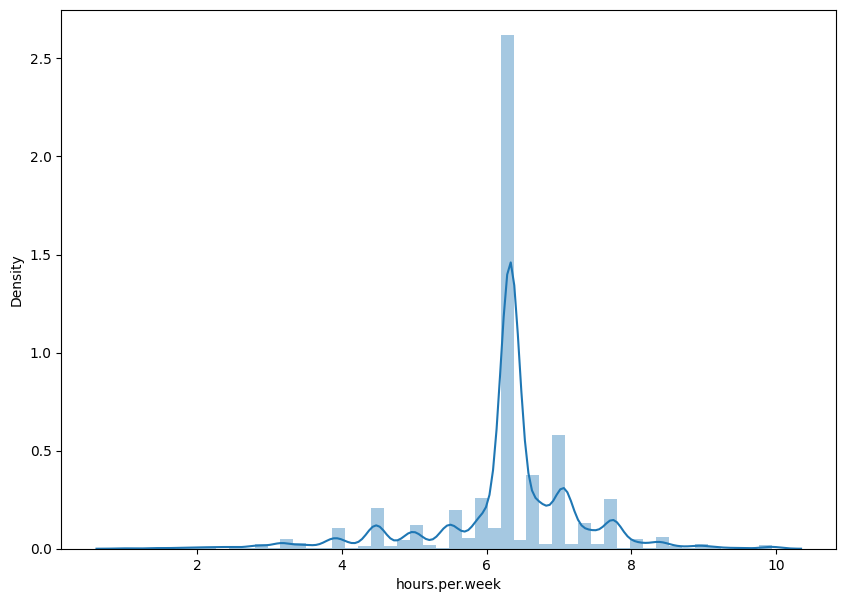

In [ ]:
cols = ['fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
for col in cols :
  improve = np.sqrt(df[col])

  plt.figure(figsize=(10,7))
  sns.distplot(improve)
  plt.show()

In [ ]:
df['education.num']=np.sqrt(df['education.num'])


In [ ]:
df['fnlwgt']=np.sqrt(df['fnlwgt'])


In [ ]:
df['hour.per.week']=np.sqrt(df['hours.per.week'])


In [ ]:
df['capital.gain']=np.sqrt(df['capital.gain'])

In [ ]:
df['capital.loss'] = np.sqrt(df['capital.loss'])

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.00000,40,United-States,0,6.324555
1,82,Private,364.513374,school,3.000000,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0.0,66.00000,18,United-States,0,4.242641
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.00000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.44998,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.44998,40,United-States,0,6.324555


FINDING OUTLIER

In [ ]:
def outlier(value):
  Q1 = value.quantile(0.25)
  Q3 = value.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1-1.5*IQR
  upper_limit = Q3+1.5*IQR
  lower_limit,upper_limit
  print("IQR",IQR,"lower_limit",lower_limit,"upper_limit",upper_limit)
  plot_outlier=plt.boxplot(value)
  return lower_limit,upper_limit,plot_outlier

IQR 20.0 lower_limit -2.0 upper_limit 78.0
outlier of age :  (-2.0, 78.0, {'whiskers': [<matplotlib.lines.Line2D object at 0x7fa00060e850>, <matplotlib.lines.Line2D object at 0x7fa00060ed90>], 'caps': [<matplotlib.lines.Line2D object at 0x7fa000613310>, <matplotlib.lines.Line2D object at 0x7fa000613850>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fa00060e2d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fa000613dd0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fa00061a350>], 'means': []})


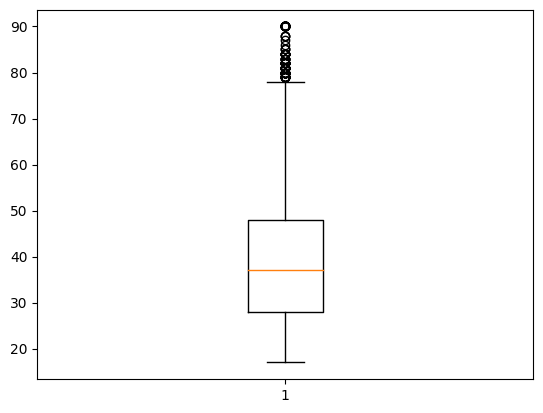

In [ ]:
print("outlier of age : ",outlier(df['age']))

IQR 0.4641016151377544 lower_limit 2.3038475772933684 upper_limit 4.1602540378443855
outlier of workclass :  (2.3038475772933684, 4.1602540378443855, {'whiskers': [<matplotlib.lines.Line2D object at 0x7fa0005fb610>, <matplotlib.lines.Line2D object at 0x7fa0005fbb50>], 'caps': [<matplotlib.lines.Line2D object at 0x7fa0006020d0>, <matplotlib.lines.Line2D object at 0x7fa000602610>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fa0005fb050>], 'medians': [<matplotlib.lines.Line2D object at 0x7fa000602b90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fa00058c110>], 'means': []})


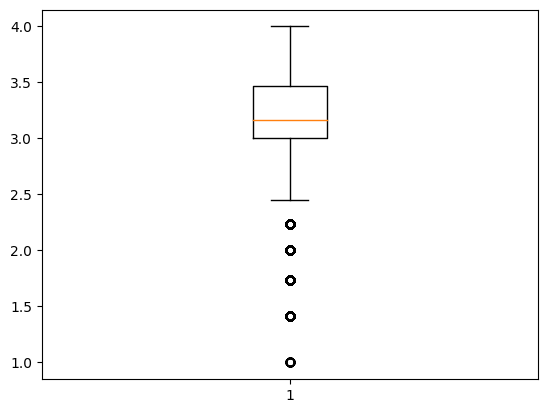

In [ ]:
print("outlier of workclass : ",outlier(df['education.num']))

IQR 143.61945788187336 lower_limit 127.83019032514204 upper_limit 702.3080218526354
outlier of fnlwgt :  (127.83019032514204, 702.3080218526354, {'whiskers': [<matplotlib.lines.Line2D object at 0x7fa0005b5e50>, <matplotlib.lines.Line2D object at 0x7fa0005773d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fa000577910>, <matplotlib.lines.Line2D object at 0x7fa000577e50>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fa0005b5890>], 'medians': [<matplotlib.lines.Line2D object at 0x7fa00057f410>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fa00057f910>], 'means': []})


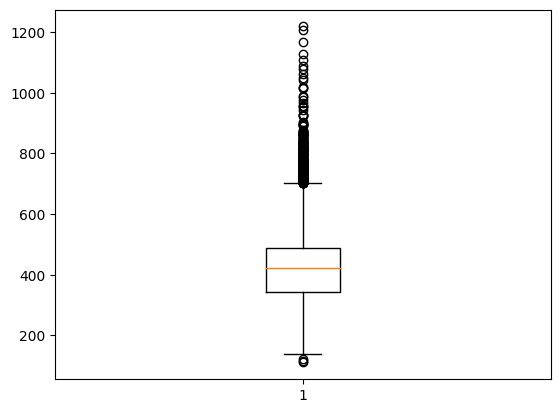

In [ ]:
print("outlier of fnlwgt : ",outlier(df['fnlwgt']))

IQR 0.0 lower_limit 0.0 upper_limit 0.0
outlier of capital.gain :  (0.0, 0.0, {'whiskers': [<matplotlib.lines.Line2D object at 0x7fa0004dcf90>, <matplotlib.lines.Line2D object at 0x7fa0004e0510>], 'caps': [<matplotlib.lines.Line2D object at 0x7fa0004e0a50>, <matplotlib.lines.Line2D object at 0x7fa0004e0f90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fa0004dc9d0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fa0004e5550>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fa0004e5a90>], 'means': []})


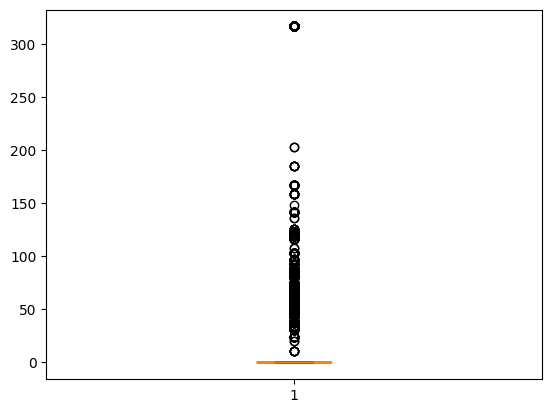

In [ ]:
print("outlier of capital.gain : ",outlier(df['capital.gain']))

IQR 0.0 lower_limit 0.0 upper_limit 0.0
outlier of capital.loss :  (0.0, 0.0, {'whiskers': [<matplotlib.lines.Line2D object at 0x7fa00044c550>, <matplotlib.lines.Line2D object at 0x7fa00044ca90>], 'caps': [<matplotlib.lines.Line2D object at 0x7fa00044cfd0>, <matplotlib.lines.Line2D object at 0x7fa000453550>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fa0004c3f50>], 'medians': [<matplotlib.lines.Line2D object at 0x7fa000453ad0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fa00045b050>], 'means': []})


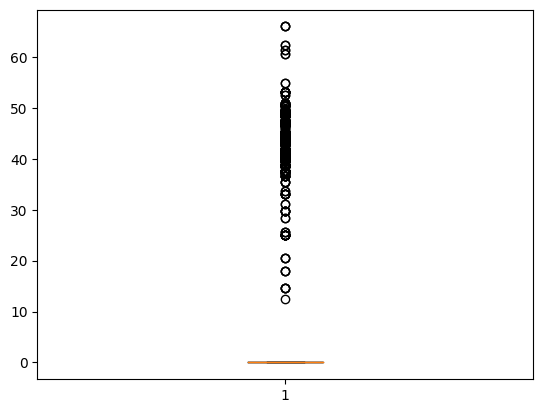

In [ ]:
print("outlier of capital.loss : ",outlier(df['capital.loss']))

IQR 0.38364861216261037 lower_limit 5.749082402092844 upper_limit 7.283676850743285
outlier of hour.per.week :  (5.749082402092844, 7.283676850743285, {'whiskers': [<matplotlib.lines.Line2D object at 0x7fa0004ad110>, <matplotlib.lines.Line2D object at 0x7fa0004ad4d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fa0004ad6d0>, <matplotlib.lines.Line2D object at 0x7fa0004c3310>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fa00045b510>], 'medians': [<matplotlib.lines.Line2D object at 0x7fa0004a6050>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fa0004a6190>], 'means': []})


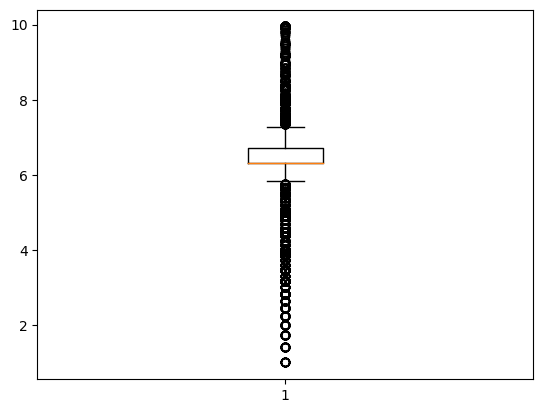

In [ ]:
print("outlier of hour.per.week : ",outlier(df['hour.per.week']))

## HANDLING OUTLIER

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['age']<lower_limit)|(df['age']>upper_limit)]

In [ ]:
no_outlier =  df[(df['age']>lower_limit)&(df['age']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.000000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.449980,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.449980,40,United-States,0,6.324555
5,34,Private,465.686590,school,3.000000,Married-spouse-absent,Other-service,Unmarried,White,Female,0.0,61.400326,45,United-States,0,6.708204
6,38,Private,388.073447,school,2.449490,Married-spouse-absent,Adm-clerical,Unmarried,White,Male,0.0,61.400326,40,United-States,0,6.324555


{'boxes': [<matplotlib.lines.Line2D at 0x7fa00050a090>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa00050f550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa00057fad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa00050fe50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa00050ac10>,
  <matplotlib.lines.Line2D at 0x7fa00050a110>]}

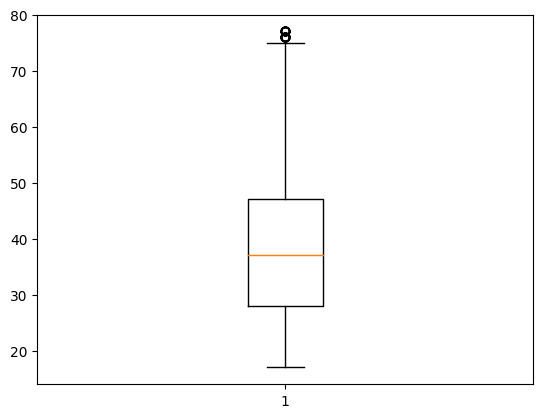

In [ ]:
plt.boxplot(no_outlier['age'])

In [ ]:
Q1 = df['education.num'].quantile(0.25)
Q3 = df['education.num'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['education.num']<lower_limit)|(df['education.num']>upper_limit)]

In [ ]:
no_outlier =  df[(df['education.num']>lower_limit)&(df['education.num']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.000000,40,United-States,0,6.324555
1,82,Private,364.513374,school,3.000000,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0.0,66.000000,18,United-States,0,4.242641
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.000000,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.449980,40,United-States,0,6.324555
5,34,Private,465.686590,school,3.000000,Married-spouse-absent,Other-service,Unmarried,White,Female,0.0,61.400326,45,United-States,0,6.708204


{'boxes': [<matplotlib.lines.Line2D at 0x7fa000613810>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa000628f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa00062fd90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa00062f090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa000613890>,
  <matplotlib.lines.Line2D at 0x7fa000613ad0>]}

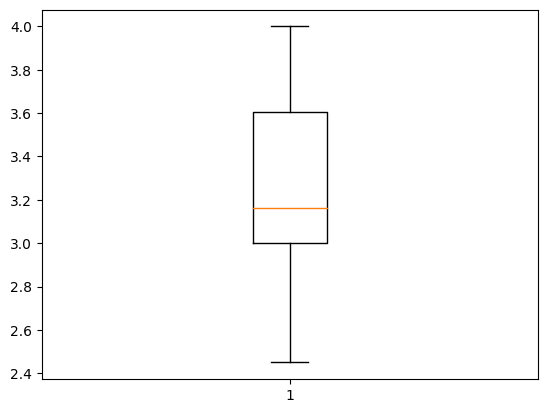

In [ ]:
plt.boxplot(no_outlier['education.num'])

In [ ]:
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['fnlwgt']<lower_limit)|(df['fnlwgt']>upper_limit)]

In [ ]:
no_outlier =  df[(df['fnlwgt']>lower_limit)&(df['fnlwgt']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.00000,40,United-States,0,6.324555
1,82,Private,364.513374,school,3.000000,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0.0,66.00000,18,United-States,0,4.242641
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.00000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.44998,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.44998,40,United-States,0,6.324555


{'boxes': [<matplotlib.lines.Line2D at 0x7fa000709f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa000774b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0006c5250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0006c5a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa000774490>,
  <matplotlib.lines.Line2D at 0x7fa000774d50>]}

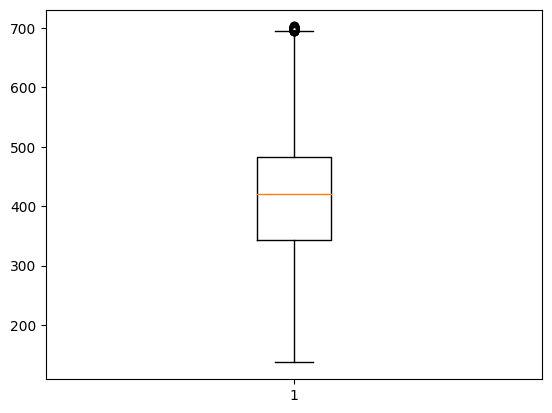

In [ ]:
plt.boxplot(no_outlier['fnlwgt'])

In [ ]:
Q1 = df['capital.gain'].quantile(0.25)
Q3 = df['capital.gain'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['capital.gain']<lower_limit)|(df['capital.gain']>upper_limit)]

In [ ]:
no_outlier =  df[(df['capital.gain']>lower_limit)&(df['capital.gain']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week


{'boxes': [<matplotlib.lines.Line2D at 0x7fa000844b90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa00081ec10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa0007df590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa0007df410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa000844b10>,
  <matplotlib.lines.Line2D at 0x7fa0008448d0>]}

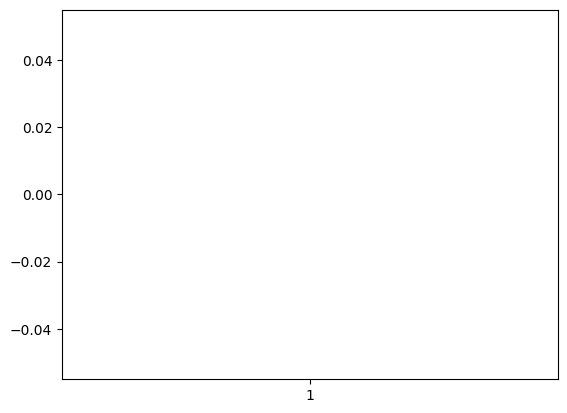

In [ ]:
plt.boxplot(no_outlier['capital.gain'])

In [ ]:
Q1 = df['capital.loss'].quantile(0.25)
Q3 = df['capital.loss'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['capital.loss']<lower_limit)|(df['capital.loss']>upper_limit)]

In [ ]:
no_outlier =  df[(df['capital.loss']>lower_limit)&(df['capital.loss']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week


{'boxes': [<matplotlib.lines.Line2D at 0x7fa0034e7550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa0034d1390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa000bb6dd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa000bb6910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa0034e7f90>,
  <matplotlib.lines.Line2D at 0x7fa0034d1510>]}

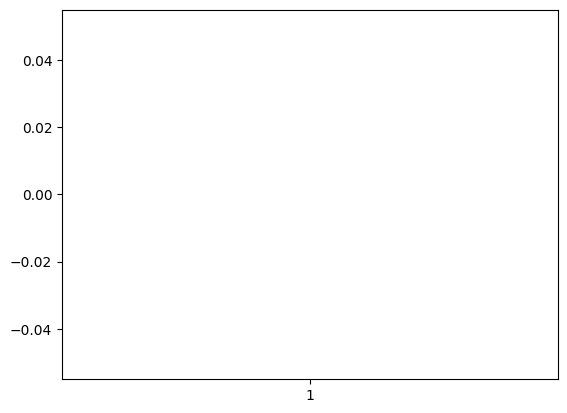

In [ ]:
plt.boxplot(no_outlier['capital.loss'])

In [ ]:
Q1 = df['hour.per.week'].quantile(0.25)
Q3 = df['hour.per.week'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['hour.per.week']<lower_limit)|(df['hour.per.week']>upper_limit)]

In [ ]:
no_outlier =  df[(df['hour.per.week']>lower_limit)&(df['hour.per.week']<upper_limit)]
no_outlier.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,Private,277.584221,school,3.000000,Married-spouse-absent,Prof-specialty,Not-in-family,White,Female,0.0,66.000000,40,United-States,0,6.324555
2,66,Private,431.347887,college,3.162278,Married-spouse-absent,Prof-specialty,Unmarried,Black,Female,0.0,66.000000,40,United-States,0,6.324555
3,54,Private,374.645165,school,2.000000,Married-spouse-absent,Machine-op-inspct,Unmarried,White,Female,0.0,62.449980,40,United-States,0,6.324555
4,41,Private,514.454080,college,3.162278,Married-spouse-absent,Prof-specialty,Own-child,White,Female,0.0,62.449980,40,United-States,0,6.324555
5,34,Private,465.686590,school,3.000000,Married-spouse-absent,Other-service,Unmarried,White,Female,0.0,61.400326,45,United-States,0,6.708204


{'boxes': [<matplotlib.lines.Line2D at 0x7fa003495b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa0071d6d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa005e7ad10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa007207690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa003495dd0>,
  <matplotlib.lines.Line2D at 0x7fa0071d6e50>]}

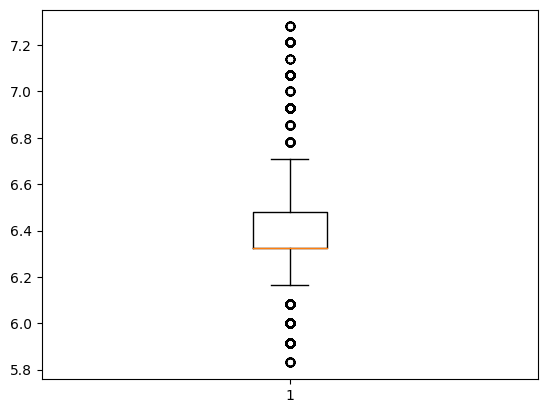

In [ ]:
plt.boxplot(no_outlier['hour.per.week'])

ONEHOTENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
for col in cols:
  df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,1,277.584221,3,3.000000,1,9,1,4,0,0.0,66.00000,40,38,0,6.324555
1,82,1,364.513374,3,3.000000,1,3,1,4,0,0.0,66.00000,18,38,0,4.242641
2,66,1,431.347887,2,3.162278,1,9,4,2,0,0.0,66.00000,40,38,0,6.324555
3,54,1,374.645165,3,2.000000,1,6,4,4,0,0.0,62.44998,40,38,0,6.324555
4,41,1,514.454080,2,3.162278,1,9,3,4,0,0.0,62.44998,40,38,0,6.324555


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
X = df.drop(['income'],axis = 1)
y = df['income']

In [ ]:
print(X.ndim)
print(y.ndim)

2
1


TRAIN TEST SPLIT 80/20

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler            #------- IMPORTING STANDARD SCALAR FOR SCALING
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,train_size=0.8)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (26048, 15)
Number transactions y_train dataset:  (26048,)
Number transactions X_test dataset:  (6513, 15)
Number transactions y_test dataset:  (6513,)


In [ ]:
ss = StandardScaler()
ss.fit_transform(X_train,y_train)
ss.transform(X_test)

array([[-1.0697512 , -0.51943447, -0.21723203, ..., -1.24792537,
         0.2602737 , -1.20508578],
       [ 0.10542427,  2.33068489, -1.98029371, ..., -0.03574312,
         0.2602737 ,  0.05046881],
       [-1.0697512 , -0.51943447,  1.81034674, ...,  1.58049988,
         0.2602737 ,  1.39783387],
       ...,
       [ 1.06025433,  2.33068489, -1.63215281, ...,  0.77237838,
         0.2602737 ,  0.75809284],
       [-0.11492113,  0.19309537, -0.86572181, ...,  1.17643913,
         0.2602737 ,  1.08524445],
       [-1.51044199,  0.19309537, -0.28999157, ..., -2.62173192,
         0.2602737 , -3.26353381]])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
folds = StratifiedKFold(n_splits = 3)
cvs = cross_val_score
          

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression     
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8151389528635038

In [ ]:
#USING CROSSVALIDATION ON TRAIN DATA
lr_score = cvs(lr,X_train,y_train ,cv = 5)
average = np.average(lr_score)
average

0.8073174105499525

In [ ]:
# USING CROSSVALIDATION ON TEST DATA
lr_score = cvs(lr,X_test,y_test ,cv = 5)
average = np.average(lr_score)
average

0.8099205072071657

In [ ]:
lr_predict =lr.predict(X_test)

In [ ]:
data = pd.DataFrame(data={"Predicted income":lr_predict.flatten(),"Actual income":y_test})
data.head(10)

,Predicted income,Actual income
22477,0,0
11703,0,0
29019,0,0
23204,0,0
3657,1,0
10214,0,0
21775,0,0
11135,0,0
17651,1,1
15043,0,1


In [ ]:
lr_predict_proba = lr.predict_proba(X_test)
lr_predict_proba

array([[0.94656975, 0.05343025],
       [0.97542896, 0.02457104],
       [0.77038495, 0.22961505],
       ...,
       [0.01930143, 0.98069857],
       [0.36946563, 0.63053437],
       [0.99275559, 0.00724441]])

In [ ]:
lr.classes_

array(['0', '1'], dtype=object)

In [ ]:
print( classification_report(y_test, lr_predict))    

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4944
           1       0.66      0.49      0.56      1569

    accuracy                           0.82      6513
   macro avg       0.75      0.70      0.72      6513
weighted avg       0.80      0.82      0.80      6513



ROC CURVE on imbalance dataset

In [ ]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,plot_precision_recall_curve   

In [ ]:
roc_auc_score(y_test,lr_predict)

0.7026801515404655

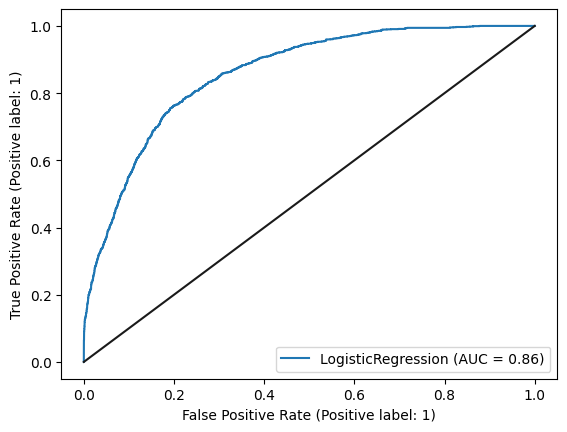

In [ ]:
plot_roc_curve(lr,X_test,y_test)
plt.plot([0,1],[0,1], c='k')    #------ base line classifier

In [ ]:
y_test.value_counts()

0    4944
1    1569
Name: income, dtype: int64

In [ ]:
1547/6513    #---- 6513

0.2375249500998004

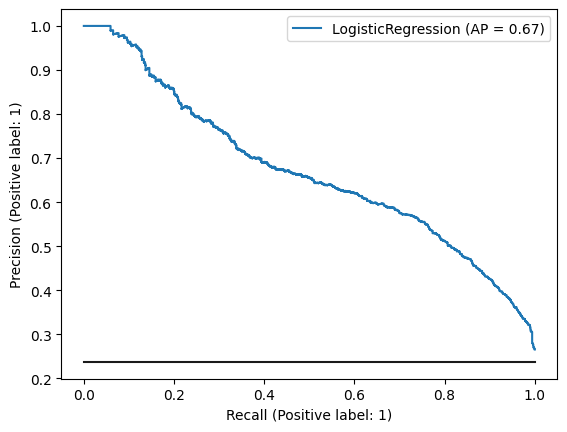

In [ ]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(lr,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')


## **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X_train,y_train)

LOGISTIG REGRESSION

In [ ]:
lr_sm = LogisticRegression()
lr_sm.fit(X_sm,y_sm)
print("The score of logistic Regression after using SMOTE : ",lr_sm.score(X_test,y_test))

The score of logistic Regression after using SMOTE :  0.7529556272071242


CROSS VALIDATION LOGISTIC REGRESSION

In [ ]:
lr_sm_cvs = cvs(lr_sm,X_sm,y_sm, cv=5)
score_lr_sm_cvs = np.average(lr_sm_cvs)
score_lr_sm_cvs

0.823930090780796

In [ ]:
lr_sm_predict = lr_sm.predict(X_test)

In [ ]:
data = pd.DataFrame(data={"Predicted income":lr_sm_predict, "Actual income":y_test})
data.head(10)

,Predicted income,Actual income
22477,0,0
11703,0,0
29019,1,0
23204,0,0
3657,1,0
10214,1,0
21775,0,0
11135,1,0
17651,1,1
15043,1,1


In [ ]:
print(classification_report(y_test,lr_sm_predict))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      4944
           1       0.49      0.79      0.61      1569

    accuracy                           0.75      6513
   macro avg       0.71      0.77      0.71      6513
weighted avg       0.82      0.75      0.77      6513



ROC curve of LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,plot_precision_recall_curve   

In [ ]:
roc_auc_score(y_test,lr_sm_predict)

0.7665764787416387

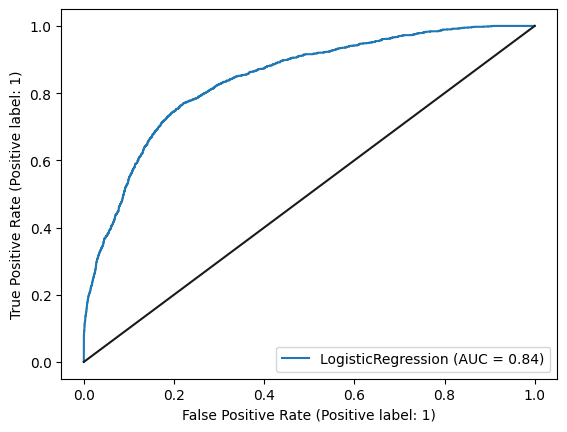

In [ ]:
plot_roc_curve(lr_sm,X_test,y_test)
plt.plot([0,1],[0,1], c='k')    #------ base line classifier

In [ ]:
y_test.value_counts()

0    4944
1    1569
Name: income, dtype: int64

In [ ]:
1547/6513  

0.2375249500998004

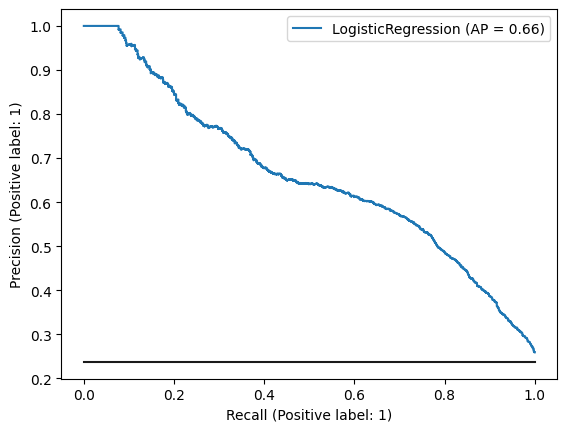

In [ ]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(lr_sm,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

# RANDOM FOREST using SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_sm,y_sm)
print("The score of Random Forest after using SMOTE :",rf.score(X_test,y_test))

The score of Random Forest after using SMOTE : 0.852141870105942


### CROSSVALIDATION

In [ ]:
rf_cvs = cvs(rf,X_sm,y_sm,cv=5)
score_rf_cvs = np.average(rf_cvs)
score_rf_cvs

0.8901480615334855

In [ ]:
rf_predict = rf.predict(X_test)

In [ ]:
data = pd.DataFrame(data={"Predicted income":rf_predict,"Actual income":y_test})
data.head(10)

,Predicted income,Actual income
22477,0,0
11703,0,0
29019,0,0
23204,0,0
3657,1,0
10214,0,0
21775,0,0
11135,1,0
17651,1,1
15043,1,1


In [ ]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4944
           1       0.70      0.67      0.69      1569

    accuracy                           0.85      6513
   macro avg       0.80      0.79      0.79      6513
weighted avg       0.85      0.85      0.85      6513



ROC curve of RANDOM FOREST

In [ ]:
roc_auc_score(y_test,rf_predict)

0.7901402012289072

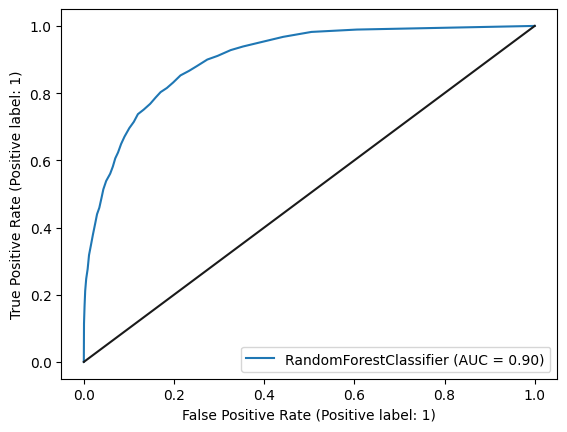

In [ ]:
plot_roc_curve(rf,X_test,y_test)
plt.plot([0,1],[0,1], c='k') 

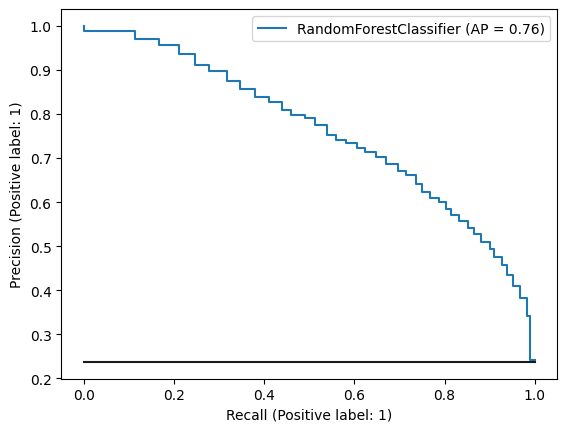

In [ ]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(rf,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

## XGBOOST USING SMOTE

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.1,max_depth=50,n_estimators=50)
model.fit(X_sm, y_sm)
print("The score of XGBOOST after using SMOTE : ",model.score(X_test,y_test))

The score of XGBOOST after using SMOTE :  0.8499923230462153


CROSSVALIDATION USING XGBOOST

In [ ]:
cvs_xgboost=cvs(model,X_sm,y_sm,cv=5)
score_cvs_xgboost = np.average(cvs_xgboost)

In [ ]:
score_cvs_xgboost

0.8909321927045204

In [ ]:
model_predict = model.predict(X_test)

In [ ]:
data = pd.DataFrame(data={"Predicted income ":model_predict,"Actual income ":y_test})
data.head(10)

,Predicted income,Actual income
22477,0,0
11703,0,0
29019,0,0
23204,0,0
3657,1,0
10214,0,0
21775,0,0
11135,1,0
17651,1,1
15043,1,1


In [ ]:
print(classification_report(y_test,model_predict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4944
           1       0.71      0.65      0.67      1569

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



ROC CURVE OF XGBOOST

In [ ]:
roc_auc_score(y_test,model_predict)

0.780240220101852

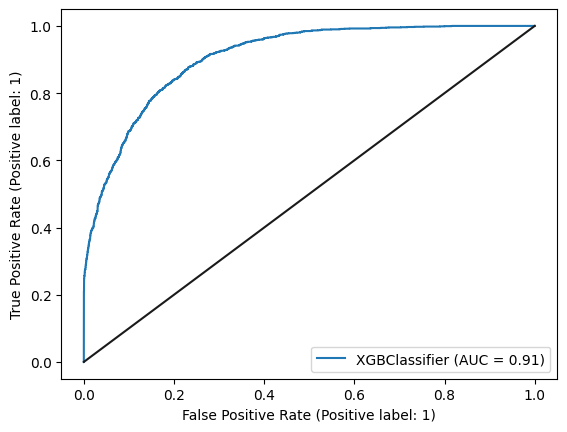

In [ ]:
plot_roc_curve(model,X_test,y_test)
plt.plot([0,1],[0,1], c='k') 

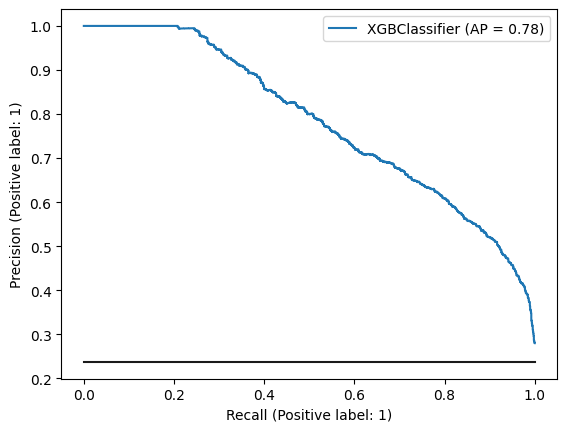

In [ ]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(model,X_test,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape                              #-----column become 15 to 2 

(32561, 2)

In [ ]:
X_pca       #-----pc1 = 32.3  pc2=-10.4

array([[-141.75172858,   -5.90231525],
       [ -54.71004336,   -7.32378534],
       [  12.20357755,   -7.26535303],
       ...,
       [ -25.98765292,   -7.80218217],
       [ -29.28335048,   -6.73880379],
       [  30.17672202,   -9.79215435]])

In [ ]:
#--- it show how much variation it capture
pca.explained_variance_ratio_   
# 0.85240629 , 0.11900622 variation is grab  ie pc1 capture 85% information pc2 capture 11% variation

array([0.90539432, 0.06449958])

In [ ]:
pca.n_components_    #---- final feature we have is 2

2

In [ ]:
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,train_size=0.8,random_state=0)

SMOTE_PCA

In [ ]:
sm = SMOTE()
X_sm_pca,y_sm_pca = sm.fit_resample(X_train_pca,y_train)

LOGISTIC REGRESION_PCA

In [ ]:
lr_sm_pca = LogisticRegression()
lr_sm_pca.fit(X_sm_pca,y_sm_pca)
print("The score of logistic Regression after using SMOTE  AND PCA: ",lr_sm_pca.score(X_test_pca,y_test))

The score of logistic Regression after using SMOTE  AND PCA:  0.7858129894058038


CROSS VALIDATION OF LOGISTIC_REGRESSION_PCA

In [ ]:
lr_sm_cvs_pca = cvs(lr_sm_pca,X_sm_pca,y_sm_pca, cv=5)
score_lr_sm_cvs_pca = np.average(lr_sm_cvs_pca)
score_lr_sm_cvs_pca

0.5827173855556411

In [ ]:
lr_sm_predict_pca = lr_sm_pca.predict(X_test_pca)

In [ ]:
data = pd.DataFrame(data={"Predicted income":lr_sm_predict_pca, "Actual income":y_test})
data.head(10)

,Predicted income,Actual income
22278,0,0
8950,0,0
7838,0,0
16505,0,0
19140,0,1
12319,0,1
28589,0,0
10000,0,0
28530,0,0
24237,0,1


In [ ]:
print(classification_report(y_test,lr_sm_predict_pca))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4966
           1       0.64      0.22      0.33      1547

    accuracy                           0.79      6513
   macro avg       0.72      0.59      0.60      6513
weighted avg       0.76      0.79      0.74      6513



ROC CURVE of LOGISTIC REGRESSION_PCA

In [ ]:
roc_auc_score(y_test,lr_sm_predict_pca)

0.5920740023758195

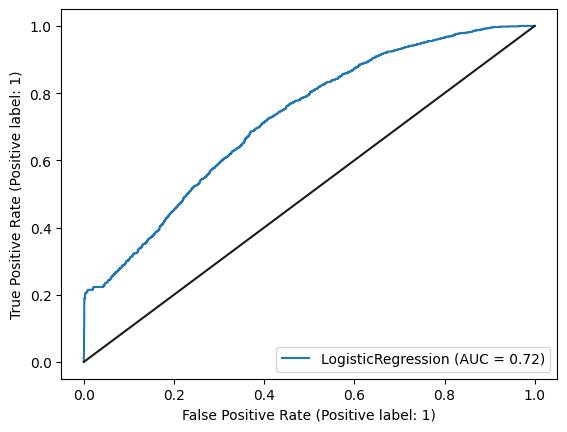

In [ ]:
plot_roc_curve(lr_sm_pca,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k') 

In [ ]:
y_test.value_counts()

0    4966
1    1547
Name: income, dtype: int64

In [ ]:
1547/6513

0.2375249500998004

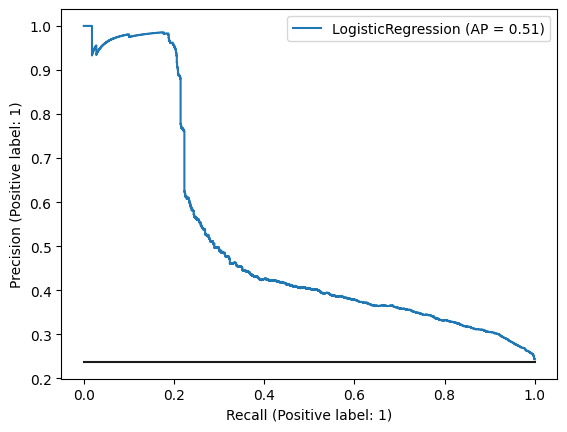

In [ ]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(lr_sm_pca,X_test_pca,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

RANDOM FOREST_PCA

In [ ]:
rf_pca = RandomForestClassifier(n_estimators=40)
rf_pca.fit(X_sm_pca,y_sm_pca)
print("The score of Random Forest after using SMOTE and PCA :",rf_pca.score(X_test_pca,y_test))

The score of Random Forest after using SMOTE and PCA : 0.6843236603715646


CROSSVLIDATION_PCA


In [ ]:
rf_cvs_pca = cvs(rf_pca,X_sm_pca,y_sm_pca,cv=5)
score_rf_cvs_pca = np.average(rf_cvs_pca)
score_rf_cvs_pca

0.7269671627032464

In [ ]:
rf_predict_pca = rf_pca.predict(X_test_pca)

In [ ]:
data = pd.DataFrame(data={"Predicted income":rf_predict_pca,"Actual income":y_test})
data.head(10)

,Predicted income,Actual income
22278,1,0
8950,0,0
7838,0,0
16505,1,0
19140,1,1
12319,0,1
28589,1,0
10000,1,0
28530,0,0
24237,1,1


In [ ]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4966
           1       0.25      0.24      0.24      1547

    accuracy                           0.65      6513
   macro avg       0.51      0.51      0.51      6513
weighted avg       0.64      0.65      0.64      6513



ROC CURVE OF RANDOMFOREST_PCA

In [ ]:
roc_pca=roc_auc_score(y_test,rf_predict_pca)
roc_pca

0.6434578664329204

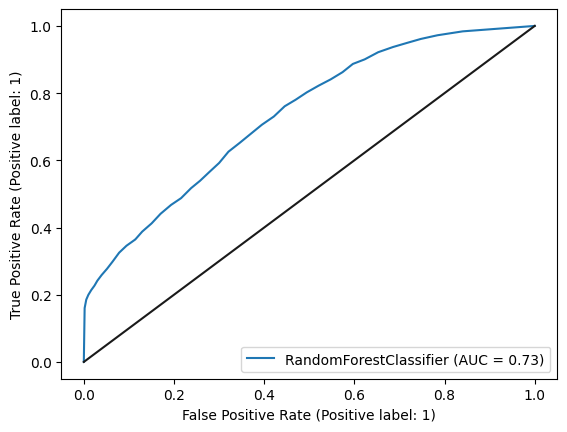

In [ ]:
plot_roc_curve(rf_pca,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k') 

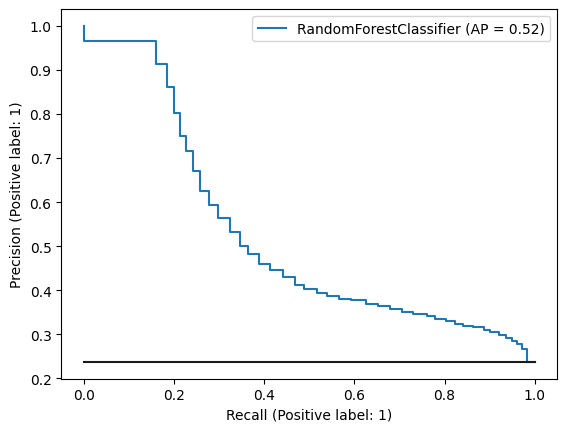

In [ ]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(rf_pca,X_test_pca,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

XGBOOST_PCA

In [ ]:
import xgboost as xgb
model_pca=xgb.XGBClassifier(learning_rate=0.1,max_depth=50,n_estimators=50)
model_pca.fit(X_sm_pca, y_sm_pca)
print("The score of XGBOOST after using SMOTE AND PCA : ",model_pca.score(X_test_pca,y_test))

The score of XGBOOST after using SMOTE AND PCA :  0.6846307385229541


CROSSVALIDATION OF XGBOOST_PCA

In [ ]:
cvs_xgboost_pca=cvs(model,X_sm_pca,y_sm_pca,cv=5)
score_cvs_xgboost_pca = np.average(cvs_xgboost_pca)

In [ ]:
score_cvs_xgboost_pca

0.7327634424112797

In [ ]:
model_predict_pca = model_pca.predict(X_test_pca)

In [ ]:
data = pd.DataFrame(data={"Predicted income ":model_predict_pca,"Actual income ":y_test})
data.head(10)

,Predicted income,Actual income
22278,0,0
8950,0,0
7838,0,0
16505,1,0
19140,1,1
12319,0,1
28589,1,0
10000,1,0
28530,0,0
24237,1,1


In [ ]:
print(classification_report(y_test,model_predict_pca))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78      4966
           1       0.39      0.59      0.47      1547

    accuracy                           0.68      6513
   macro avg       0.62      0.65      0.62      6513
weighted avg       0.74      0.68      0.70      6513



ROC CURVE OF XGBOOST_PCA

In [ ]:
roc_auc_score(y_test,model_predict_pca)

0.65122496844086

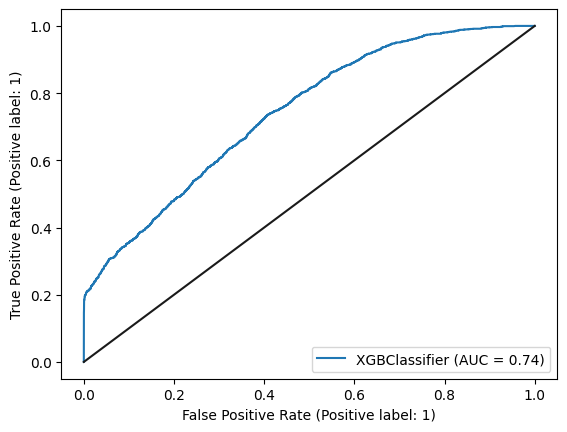

In [ ]:
plot_roc_curve(model_pca,X_test_pca,y_test)
plt.plot([0,1],[0,1], c='k') 

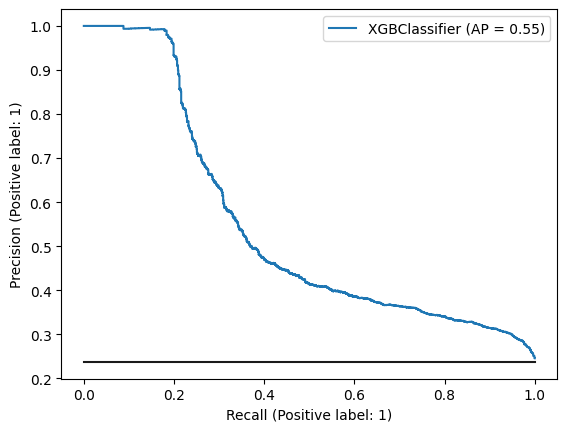

In [ ]:
# PR ARE USED WHEN ONE CLASS DOMINATE OTHERS
plot_precision_recall_curve(model_pca,X_test_pca,y_test)
plt.plot([0,1],[0.2375,0.2375], c='k') 
plt.legend(loc='best')

# CLUSTERING

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hour.per.week
0,90,1,277.584221,3,3.000000,1,9,1,4,0,0.0,66.00000,40,38,0,6.324555
1,82,1,364.513374,3,3.000000,1,3,1,4,0,0.0,66.00000,18,38,0,4.242641
2,66,1,431.347887,2,3.162278,1,9,4,2,0,0.0,66.00000,40,38,0,6.324555
3,54,1,374.645165,3,2.000000,1,6,4,4,0,0.0,62.44998,40,38,0,6.324555
4,41,1,514.454080,2,3.162278,1,9,3,4,0,0.0,62.44998,40,38,0,6.324555


In [ ]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.datasets import make_blobs

In [ ]:
datasets = make_blobs(n_samples=200,
                      centers = 4,
                      n_features=2,
                      cluster_std=1.6,
                      random_state=50)

In [ ]:
points = datasets[0]

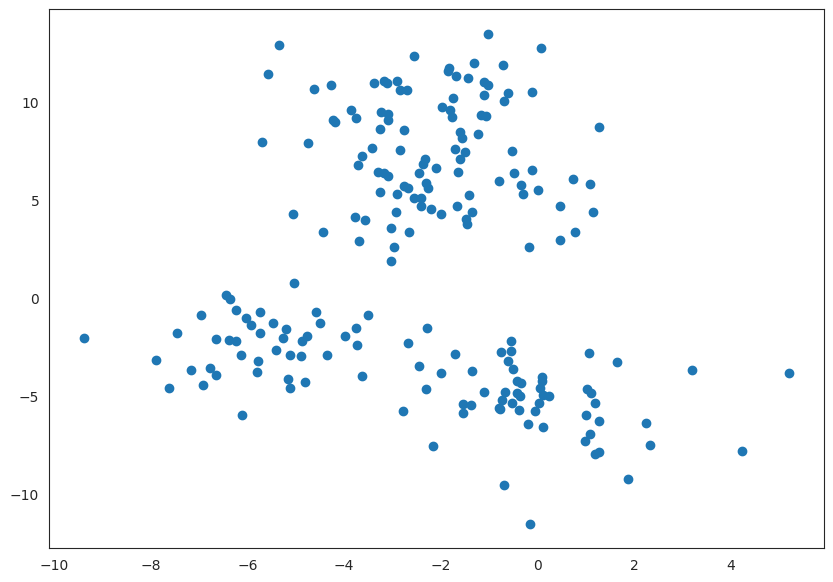

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('white')
plt.scatter(datasets[0][:,0],datasets[0][:,1])

In [ ]:
k = range(1,11)
wss= []
points = datasets[0]
for i in k:
  km = KMeans(n_clusters=i)
  km.fit(points)
  wss.append(km.inertia_)     

In [ ]:
my_centers = pd.DataFrame({'Clusters' : k, 'WSS' : wss})
my_centers

,Clusters,WSS
0,1,9167.878428
1,2,2535.479916
2,3,1530.233897
3,4,916.395212
4,5,787.010739
5,6,695.724478
6,7,609.795984
7,8,548.767871
8,9,502.410527
9,10,439.954401


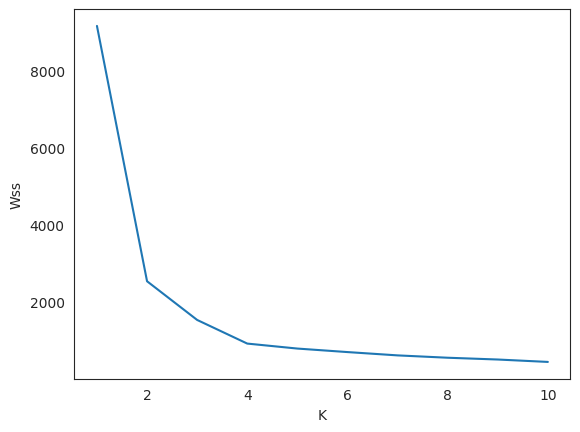

In [ ]:
plt.xlabel('K')
plt.ylabel('Wss')
plt.plot(k,wss)

IMPORTING KMEANS

In [ ]:
kmeans =cluster.KMeans(n_clusters=4,init="k-means++")
kmeans = kmeans.fit(points)
kmeans

KMeans(n_clusters=4)

CLUSTERS CENTERS

In [ ]:
# clusters centers
cluster=kmeans.cluster_centers_
cluster

array([[ 0.05161133, -5.35489826],
       [-1.92101646,  5.21673484],
       [-5.56465793, -2.34988939],
       [-2.40167949, 10.17352695]])

In [ ]:
kmeans_predict = kmeans.fit_predict(points)
kmeans_predict

array([3, 1, 0, 3, 2, 1, 3, 1, 1, 2, 2, 3, 2, 0, 2, 0, 3, 3, 2, 2, 2, 0,
       3, 3, 3, 0, 3, 1, 0, 3, 3, 2, 2, 1, 1, 2, 2, 2, 0, 0, 3, 2, 0, 0,
       1, 1, 3, 0, 0, 3, 1, 2, 0, 3, 0, 0, 1, 2, 2, 0, 1, 1, 3, 1, 1, 3,
       1, 0, 3, 3, 1, 2, 3, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 3, 1,
       3, 2, 1, 3, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 3, 0, 1, 0, 1, 2, 3,
       1, 2, 3, 3, 2, 0, 3, 3, 0, 1, 3, 0, 3, 3, 1, 3, 3, 0, 0, 1, 2, 1,
       1, 0, 3, 0, 1, 3, 3, 2, 3, 0, 0, 1, 2, 3, 1, 0, 1, 2, 3, 2, 0, 1,
       1, 0, 3, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0,
       2, 1, 3, 0, 1, 0, 0, 3, 2, 1, 2, 3, 0, 1, 0, 0, 2, 0, 1, 3, 2, 0,
       2, 3], dtype=int32)

In [ ]:
data = pd.DataFrame(data={"Predicted income ":kmeans_predict})
data.head(10)

,Predicted income
0,3
1,1
2,0
3,3
4,2
5,1
6,3
7,1
8,1
9,2


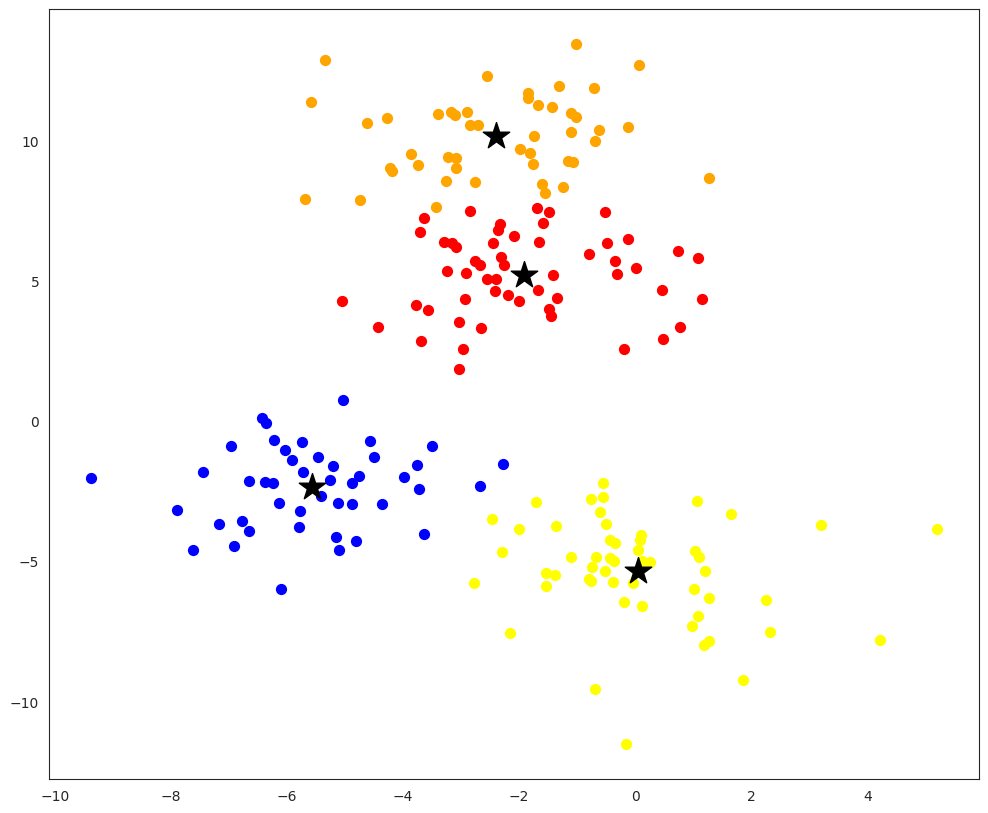

In [ ]:
plt.figure(figsize=(12,10))
sns.set_style('white')
plt.scatter(points[kmeans_predict==0,0], points[kmeans_predict==0,1], s=50, color = 'red')
plt.scatter(points[kmeans_predict==1,0], points[kmeans_predict==1,1], s=50, color = 'yellow')
plt.scatter(points[kmeans_predict==2,0], points[kmeans_predict==2,1], s=50, color = 'blue')
plt.scatter(points[kmeans_predict==3,0], points[kmeans_predict==3,1], s=50, color = 'orange')
plt.scatter(cluster[0][0],cluster[0][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[1][0],cluster[1][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[2][0],cluster[2][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[3][0],cluster[3][1],marker='*', s=400 , color = 'black')


Conclusion
Analysis

As soon as we look at the dataset we realize that this is a US based survey. Mostly, people of the white and black ethinicity took part in the survey but other ethinicities were present as well. There was less biased data when it came to people belonging to the Asian-Pac-Island group where the ratio between people earning more than 50K and those earning less than the same was lower compared to other ethinicities. This dataset also containes information about more males than females. This may be because females did not prefer to take the survey. Also, this dataset is biased towards people making <=50K USD.

As we went through with the analysis, we found many interesting things. Most people usually go and find work right after their Highschool. However, some persue bachelors or higher studies like masters and doctorate or specializations tend to earn more. Some people don't even make it through highschool and these people almost always earn less than 50K which might be because of a lack of skill, education, exposure or more.

We noticed that there is barely any capital gain or capital loss for most people. Which leads us to believe that there is not a lot of growth in economy. However, the amount of gain people make is overwhelming compared to the amount they lose.

With our heatmap, we saw no mathematical correlation but from the other analysis methods we found some insightful information. From this survey we see that a lot of women earn less than 50K. It's just not women, but minorities in Race also seem to earn less.

People tend to work 40 hour weeks but it is not unusual to see people working a lot more or a lot less. And the age group of people working range from a young age of 17 to the age of over 90. It is interesting as people that old work as well. Both of these features combined give tell us that people older than 60 usually tend to work less. Most people who earn more than 50k either work long weeks or short weeks.